In [1]:
#Import Libraries
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
from math import sqrt

In [2]:
#Initiallize Dataset
X = np.array([2.50,0.50,2.20,1.90,3.10,2.30,2.00,1.00,1.50,1.10])
Y = np.array([2.40,0.70,2.90,2.20,3.00,2.70,1.60,1.10,1.60,0.90])

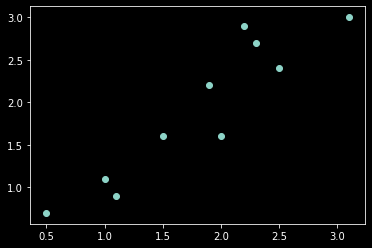

In [3]:
#Original Dataset Plot
plt.scatter(X,Y)

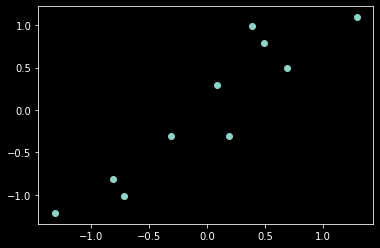

In [4]:
x_dash = mean(X)
y_dash = mean(Y)

#subtract mean from the data
X_minus_mean = X - x_dash
Y_minus_mean = Y - y_dash
plt.scatter(X_minus_mean,Y_minus_mean)

In [5]:
#Calculate Covariance Matrix
N = X_minus_mean.size
Cxx = np.dot( (X_minus_mean) , (X_minus_mean) ) / (N-1)
Cxy = np.dot( (X_minus_mean) , (Y_minus_mean) ) / (N-1)
Cyy = np.dot( (Y_minus_mean) , (Y_minus_mean) ) / (N-1)

covariance_matrix = np.array([[Cxx,Cxy],[Cxy,Cyy]])
print(covariance_matrix)

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


In [6]:
# Calculate Eigen Values
a =  covariance_matrix
eigen_values = np.array(
    [ 
    [(a[0][0] + a[1][1] + sqrt(pow(a[0][0] - a[1][1] , 2) + (4 * a[1][0] * a[0][1] ))) / 2 ] ,
    [(a[0][0] + a[1][1] - sqrt(pow(a[0][0] - a[1][1] , 2) + (4 * a[1][0] * a[0][1] ))) / 2 ]
    ]
    )
print(eigen_values)

[[1.28402771]
 [0.0490834 ]]


In [7]:
## Calculate Eigen Vector
#First Step : (A - lambda * I)
lamda1_Eigen = covariance_matrix - ( eigen_values[0] * np.identity(2) )
lamda2_Eigen = covariance_matrix - ( eigen_values[1] * np.identity(2) )
print(lamda1_Eigen)
print(lamda2_Eigen)


[[-0.66747216  0.61544444]
 [ 0.61544444 -0.56747216]]
[[0.56747216 0.61544444]
 [0.61544444 0.66747216]]


In [8]:
#Second Step : get vectors
eigen_vector = np.array(
    [ 
    [ [1.0] , [ -lamda1_Eigen[0][1] / lamda1_Eigen[0][0] ] ] ,
    [ [1.0] , [ -lamda2_Eigen[0][1] / lamda2_Eigen[0][0] ] ]
    ]
    )

print(eigen_vector)    

[[[ 1.        ]
  [ 0.92205261]]

 [[ 1.        ]
  [-1.08453681]]]


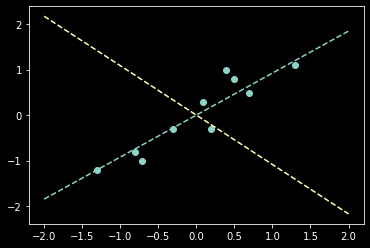

In [10]:
##Draw eigen vectors
x_vals = np.array([-2,2])
y1_vals = eigen_vector[0][1] * x_vals
y2_vals = eigen_vector[1][1] * x_vals
plt.plot(x_vals, y1_vals, '--')
plt.plot(x_vals, y2_vals, '--')
plt.scatter(X_minus_mean,Y_minus_mean)

In [11]:
## we will choose eigen vector 1 with slope = 0.922 because it has bigger corresponding eigen value  (blue line)

In [ ]:
## Let's choose 2 feature vecor sets:

# A + B
feature_vector_1 = 